In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from io import StringIO
import requests
import json
import pandas as pd
%matplotlib inline

In [2]:
# The code was removed by DSX for sharing.

In [3]:
df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'materials.csv'), header = None)
df_data_1.head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,8951,1745,1.74,65,6439,6.43,65,6511,6.51,65,...,0,0,0,0,0,0,0,0,0,0
1,8997,1515,1.51,67,1745,1.74,65,4503,4.50,67,...,0,0,0,0,0,0,0,0,0,0
2,9024,1745,1.74,65,6439,6.43,65,6511,6.51,65,...,0,0,0,0,0,0,0,0,0,0
3,9043,1745,1.74,65,6303,6.30,65,6439,6.43,65,...,0,0,0,0,0,0,0,0,0,0
4,9313,1745,1.74,65,6439,6.43,65,6511,6.51,65,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_data_1.describe()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,...,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,20549.985477,3336.178423,3.331079,65.070539,6927.813278,6.923776,65.825726,8847.107884,8.842614,65.358921,...,0.273859,31.184647,0.031183,0.139004,31.197095,0.031183,0.139004,33.894191,0.033880,0.134855
std,6532.354374,4661.224791,4.661112,1.812180,6402.422148,6.402340,2.109951,5610.778906,5.610399,7.676801,...,4.247502,684.643289,0.684598,3.051766,684.916582,0.684598,3.051766,744.129959,0.743811,2.960669
min,8951.000000,27.000000,0.020000,49.000000,1635.000000,1.630000,49.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13511.250000,1745.000000,1.740000,65.000000,4563.000000,4.560000,65.000000,6265.000000,6.260000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23943.000000,1745.000000,1.740000,65.000000,6155.000000,6.150000,66.000000,6417.000000,6.410000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25727.750000,1745.000000,1.740000,65.000000,6303.000000,6.300000,67.000000,11543.000000,11.540000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,29526.000000,35775.000000,35.770000,68.000000,35800.000000,35.800000,68.000000,35194.000000,35.190000,68.000000,...,67.000000,15031.000000,15.030000,67.000000,15037.000000,15.030000,67.000000,16337.000000,16.330000,65.000000


In [5]:
print df_data_1.shape

(482, 88)


In [6]:
mp_set = set([])
for i in np.arange(1,87, 3):
    df_data_1[i] = df_data_1[i].astype(int)
    tmp = set(df_data_1[i].unique())
    mp_set = mp_set | tmp 

mp_set = mp_set - set([0])
print "Il numero di materie prime è " + str(len(mp_set))

Il numero di materie prime è 375


In [7]:
gr_set = set([])
for i in np.arange(3,88, 3):
    df_data_1[i] = df_data_1[i].astype(int)
    tmp = set(df_data_1[i].unique())
    gr_set = gr_set | tmp
    
gr_set = gr_set - set([0])
print "Il numero di gruppi è " + str(len(gr_set))

Il numero di gruppi è 9


In [8]:
my_dict = {}

for index,row in df_data_1.iterrows():
    my_row = {}
    tmp = 0
    for i in np.arange(2,87, 3):
        tmp += row[i] 
        if row[i]!= 0:
            my_row[str(int(row[i-1]))+"_"+str(int(row[i+1]))] = row[i]
    my_dict[row[0]] = my_row
    
df_data2 = pd.DataFrame.from_dict(my_dict, 'index').fillna(0)
print df_data2.shape
df_data2.head()

(482, 650)


,32488_67,15015_65,6439_65,13709_65,16637_65,32322_66,15027_65,6303_65,1739_65,1745_65,...,34622_65,34545_65,34917_66,32597_67,35588_67,32912_51,34283_66,32938_67,32936_67,32579_67
8951,0,15.01,6.43,13.7,0,0.00,15.02,0.0,0,1.74,...,0,0,0,0,0,0,0,0,0,0
8997,0,0.00,0.00,0.0,0,0.00,0.00,0.0,0,1.74,...,0,0,0,0,0,0,0,0,0,0
9024,0,15.01,6.43,13.7,0,0.00,15.02,0.0,0,1.74,...,0,0,0,0,0,0,0,0,0,0
9043,0,15.01,6.43,13.7,0,32.32,15.02,6.3,0,1.74,...,0,0,0,0,0,0,0,0,0,0
9313,0,15.01,6.43,13.7,0,0.00,15.02,0.0,0,1.74,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_data2 = df_data2.div(df_data2.sum(axis= 1), axis= 0)

In [10]:
df_data2.describe()

,32488_67,15015_65,6439_65,13709_65,16637_65,32322_66,15027_65,6303_65,1739_65,1745_65,...,34622_65,34545_65,34917_66,32597_67,35588_67,32912_51,34283_66,32938_67,32936_67,32579_67
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,...,482.00000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,0.005431,0.002590,0.001113,0.006691,0.000942,0.008525,0.003454,0.002846,0.000518,0.005085,...,0.00013,0.000130,0.000131,0.000392,0.000290,0.000306,0.000196,0.000219,0.000452,0.000392
std,0.033055,0.015385,0.006599,0.020082,0.010343,0.038794,0.015161,0.008594,0.001760,0.004083,...,0.00286,0.002853,0.002884,0.008609,0.006377,0.006709,0.004297,0.004805,0.007017,0.008615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005765,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008286,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.232631,0.107506,0.046054,0.098123,0.119109,0.231485,0.107578,0.045122,0.012391,0.015604,...,0.06279,0.062645,0.063316,0.189015,0.140002,0.147294,0.094342,0.105481,0.112489,0.189141


for index, row in df_data2.iterrows():
    if row.sum() != float(1.0) :
        print 'KO'
        print row.sum()

In [11]:
pca = PCA(n_components = df_data2.shape[1])
pca.fit(df_data2)
expl_var = np.array(pca.explained_variance_ratio_)
cum_expl_var = np.cumsum(expl_var)
#print cum_expl_var

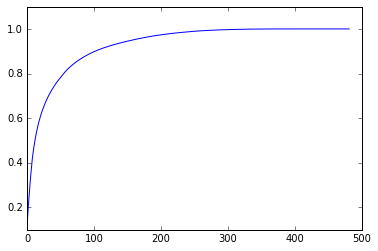

In [12]:
x = np.arange(cum_expl_var.shape[0])
y = cum_expl_var
plt.plot(x,y)

In [13]:
def num_components(cum_var, thrs):
    return (cum_var < thrs).sum()

In [14]:
print num_components(cum_expl_var, 0.94)
print num_components(cum_expl_var, 0.95)
print num_components(cum_expl_var, 0.96)
print num_components(cum_expl_var, 0.97)
print num_components(cum_expl_var, 0.98)
print num_components(cum_expl_var, 0.99)

143
157
173
193
217
253


In [15]:
pca = PCA(n_components = num_components(cum_expl_var, 0.97))
x_trasf = pca.fit_transform(df_data2)
expl_var = np.array(pca.explained_variance_ratio_)
cum_expl_var = np.cumsum(expl_var)
#print cum_expl_var

In [16]:
df_data3 = pd.DataFrame(x_trasf, index = df_data2.index)
print df_data3.shape
df_data3.head()

(482, 193)


,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
8951,0.042246,-0.005937,0.027117,-0.001903,0.013791,-0.022353,0.063907,-0.023371,0.004564,-0.012443,...,0.000227,0.000112,0.000044,0.000041,-0.000015,-7.860875e-07,-0.000057,-0.000066,0.000062,0.000020
8997,0.027176,0.087921,-0.077450,0.032441,0.005934,0.029765,0.009249,0.004650,-0.003320,0.016842,...,-0.008613,-0.012683,0.004724,0.008423,0.006751,-1.920840e-03,-0.006889,-0.004928,-0.010872,-0.005499
9024,0.042246,-0.005937,0.027117,-0.001903,0.013791,-0.022353,0.063907,-0.023371,0.004564,-0.012443,...,0.000227,0.000112,0.000044,0.000041,-0.000015,-7.860875e-07,-0.000057,-0.000066,0.000062,0.000020
9043,0.052750,0.002831,0.037146,-0.011094,0.035755,-0.066244,0.203717,-0.099144,0.056779,-0.056352,...,-0.004587,-0.000884,-0.000036,-0.000659,-0.000442,-4.274769e-04,0.000617,0.000255,-0.000725,0.002245
9313,0.042074,-0.005888,0.026843,-0.001879,0.013626,-0.022069,0.063027,-0.023009,0.004487,-0.012187,...,-0.001677,-0.000871,-0.000362,-0.000424,0.000138,2.836292e-06,0.000862,0.001160,-0.001382,-0.000705


In [17]:
#print (x_trasf.sum(axis=1))
df_data3.describe()

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
count,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,...,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02
mean,1.842694e-18,3.685388e-18,-9.213469e-18,-6.449428e-18,9.213469e-19,-5.528081e-18,-3.685388e-18,9.213469e-19,-6.449428e-18,9.213469e-19,...,7.198023e-20,4.318814e-19,-4.462774e-19,-1.425208e-18,-1.425208e-18,2.375347e-19,-3.635001e-19,1.252456e-18,3.886932e-19,1.439605e-19
std,1.050786e-01,7.221950e-02,6.680754e-02,6.232823e-02,6.177765e-02,6.012624e-02,5.775205e-02,5.479259e-02,5.394734e-02,4.741880e-02,...,7.060713e-03,7.039238e-03,7.019559e-03,6.960965e-03,6.945740e-03,6.921454e-03,6.887080e-03,6.854642e-03,6.817388e-03,6.775658e-03
min,-2.980561e-01,-3.694939e-01,-2.213105e-01,-1.258156e-01,-1.177639e-01,-3.434987e-01,-1.307053e-01,-1.421249e-01,-2.121455e-01,-1.902099e-01,...,-2.970575e-02,-3.788123e-02,-3.101782e-02,-6.278798e-02,-4.950147e-02,-1.213840e-01,-2.927176e-02,-7.643113e-02,-2.843521e-02,-2.656972e-02
25%,3.213455e-02,-1.475760e-02,-1.281294e-02,-3.496998e-02,-1.308803e-02,-3.030281e-02,-1.571625e-02,-2.986993e-02,-1.602491e-02,-2.826749e-02,...,-2.447988e-03,-2.954735e-03,-2.019191e-03,-2.627068e-03,-2.048575e-03,-9.304009e-04,-2.804650e-03,-1.823044e-03,-2.476044e-03,-3.093490e-03
50%,4.542832e-02,8.924652e-04,5.728693e-03,-6.897151e-03,2.555619e-03,-5.086062e-03,1.909469e-03,-1.575867e-03,6.948027e-03,6.591381e-03,...,3.268333e-05,-1.127931e-04,-1.120035e-04,4.279772e-05,2.415286e-04,-5.485550e-05,3.518820e-06,-6.377515e-05,3.187377e-05,-2.837130e-07
75%,5.241260e-02,2.078473e-02,4.196643e-02,2.204733e-02,1.126573e-02,3.577146e-02,1.594571e-02,1.718204e-02,2.395516e-02,2.289070e-02,...,2.624227e-03,2.422934e-03,2.130181e-03,2.907225e-03,2.267049e-03,8.088601e-04,2.651738e-03,2.149918e-03,2.164635e-03,2.856944e-03
max,8.496021e-02,1.673477e-01,1.652439e-01,4.025863e-01,4.933492e-01,1.397258e-01,2.829590e-01,1.744289e-01,8.588040e-02,1.288936e-01,...,3.529283e-02,4.368540e-02,8.874855e-02,4.904225e-02,5.278659e-02,5.728785e-02,4.838380e-02,3.249137e-02,6.341007e-02,2.834995e-02


In [18]:
df_data3.to_csv('cleaned_materials.csv')

In [19]:
put_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'cleaned_materials.csv')

<Response [201]>
